In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
        
assert model(3.0).numpy() == 15.0

In [3]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [4]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

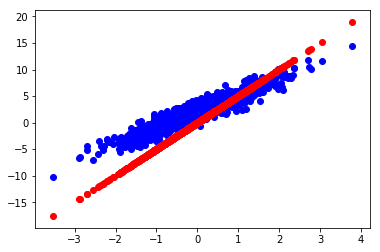

Current loss: 9.042861938476562


In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: {}'.format(loss(model(inputs), outputs).numpy()))

In [9]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=9.04286
Epoch  1: W=4.61 b=0.41, loss=6.16432
Epoch  2: W=4.30 b=0.74, loss=4.31652
Epoch  3: W=4.05 b=1.00, loss=3.13031
Epoch  4: W=3.84 b=1.21, loss=2.36876
Epoch  5: W=3.68 b=1.38, loss=1.87981
Epoch  6: W=3.55 b=1.51, loss=1.56587
Epoch  7: W=3.45 b=1.62, loss=1.36429
Epoch  8: W=3.36 b=1.70, loss=1.23484
Epoch  9: W=3.29 b=1.77, loss=1.15171


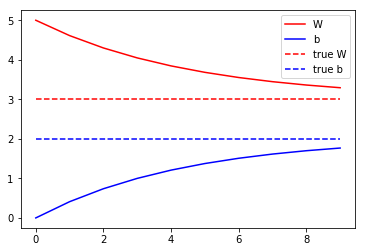

In [10]:
model = Model()

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))
    
plt.figure()
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

